**SPRINT 1(PART1)**

**DATA VISUALIZATION,TRAINING,TESTING AND PREDICTION OF THE MODEL IN NOTEBOOK**

**IMPORTING THE LIBRARIES**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

**DOWNLOAD AND LOAD THE DATASET**

In [4]:
data  = pd.read_csv('/content/drive/MyDrive/Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

**PERFORMING VISUALIZATIONS**

**UNIVARIATE ANALYSIS**

**DIST PLOT**

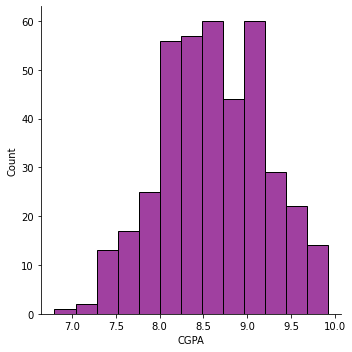

In [6]:
sns.displot(data["CGPA"], color='purple')

**HIST PLOT**

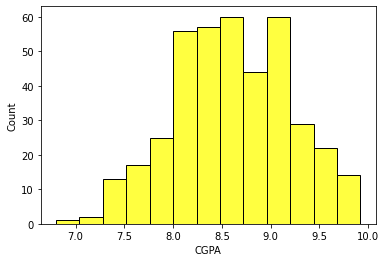

In [7]:
sns.histplot(x=data.CGPA,color='yellow')

**BOX PLOT**

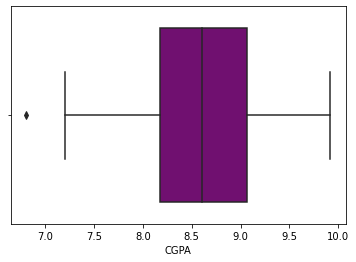

In [8]:
sns.boxplot(x=data.CGPA,color='purple')

**COUNT PLOT**

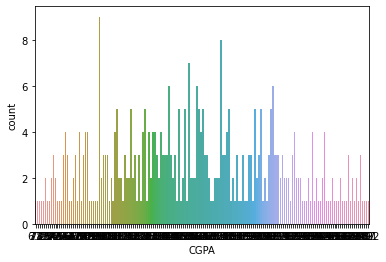

In [9]:
sns.countplot(x=data.CGPA)

**BIVARIATE ANALYSIS**

**BAR PLOT**

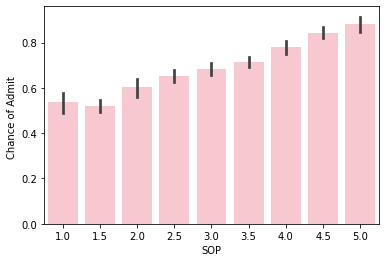

In [10]:
sns.barplot(x=data["SOP"],y=data["Chance of Admit "],color='pink')

**REGRESSION PLOT**

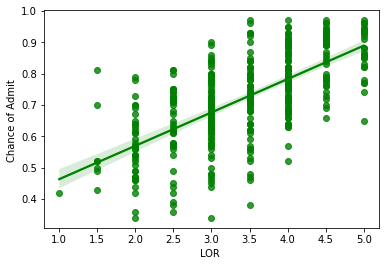

In [11]:
sns.regplot(x=data["LOR "],y=data["Chance of Admit "],color='green')

**POINT PLOT**

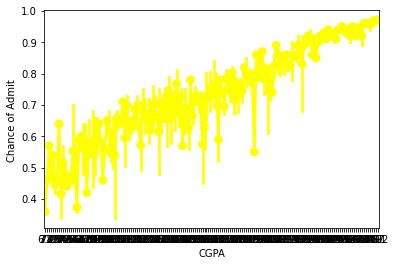

In [12]:
sns.pointplot(x=data["CGPA"], y=data["Chance of Admit "], color="yellow")

**LINE PLOT**

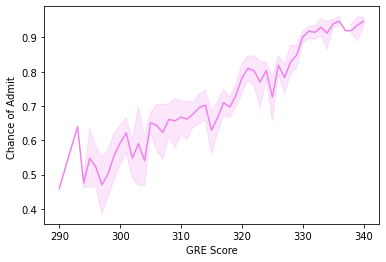

In [13]:
sns.lineplot(x=data["GRE Score"],y=data["Chance of Admit "], color='violet')

**BAR PLOT**

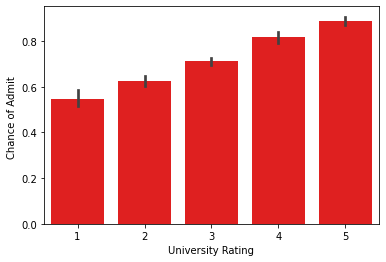

In [14]:
sns.barplot(x="University Rating", y="Chance of Admit ", data=data,color="Red")

**MULTIVARIATE ANALYSIS**

**HIST PLOT**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f44d06cb790>,
      dtype=object)

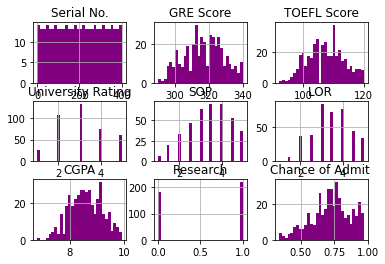

In [15]:
data.hist(bins = 30,color='purple')

**PAIR PLOT**

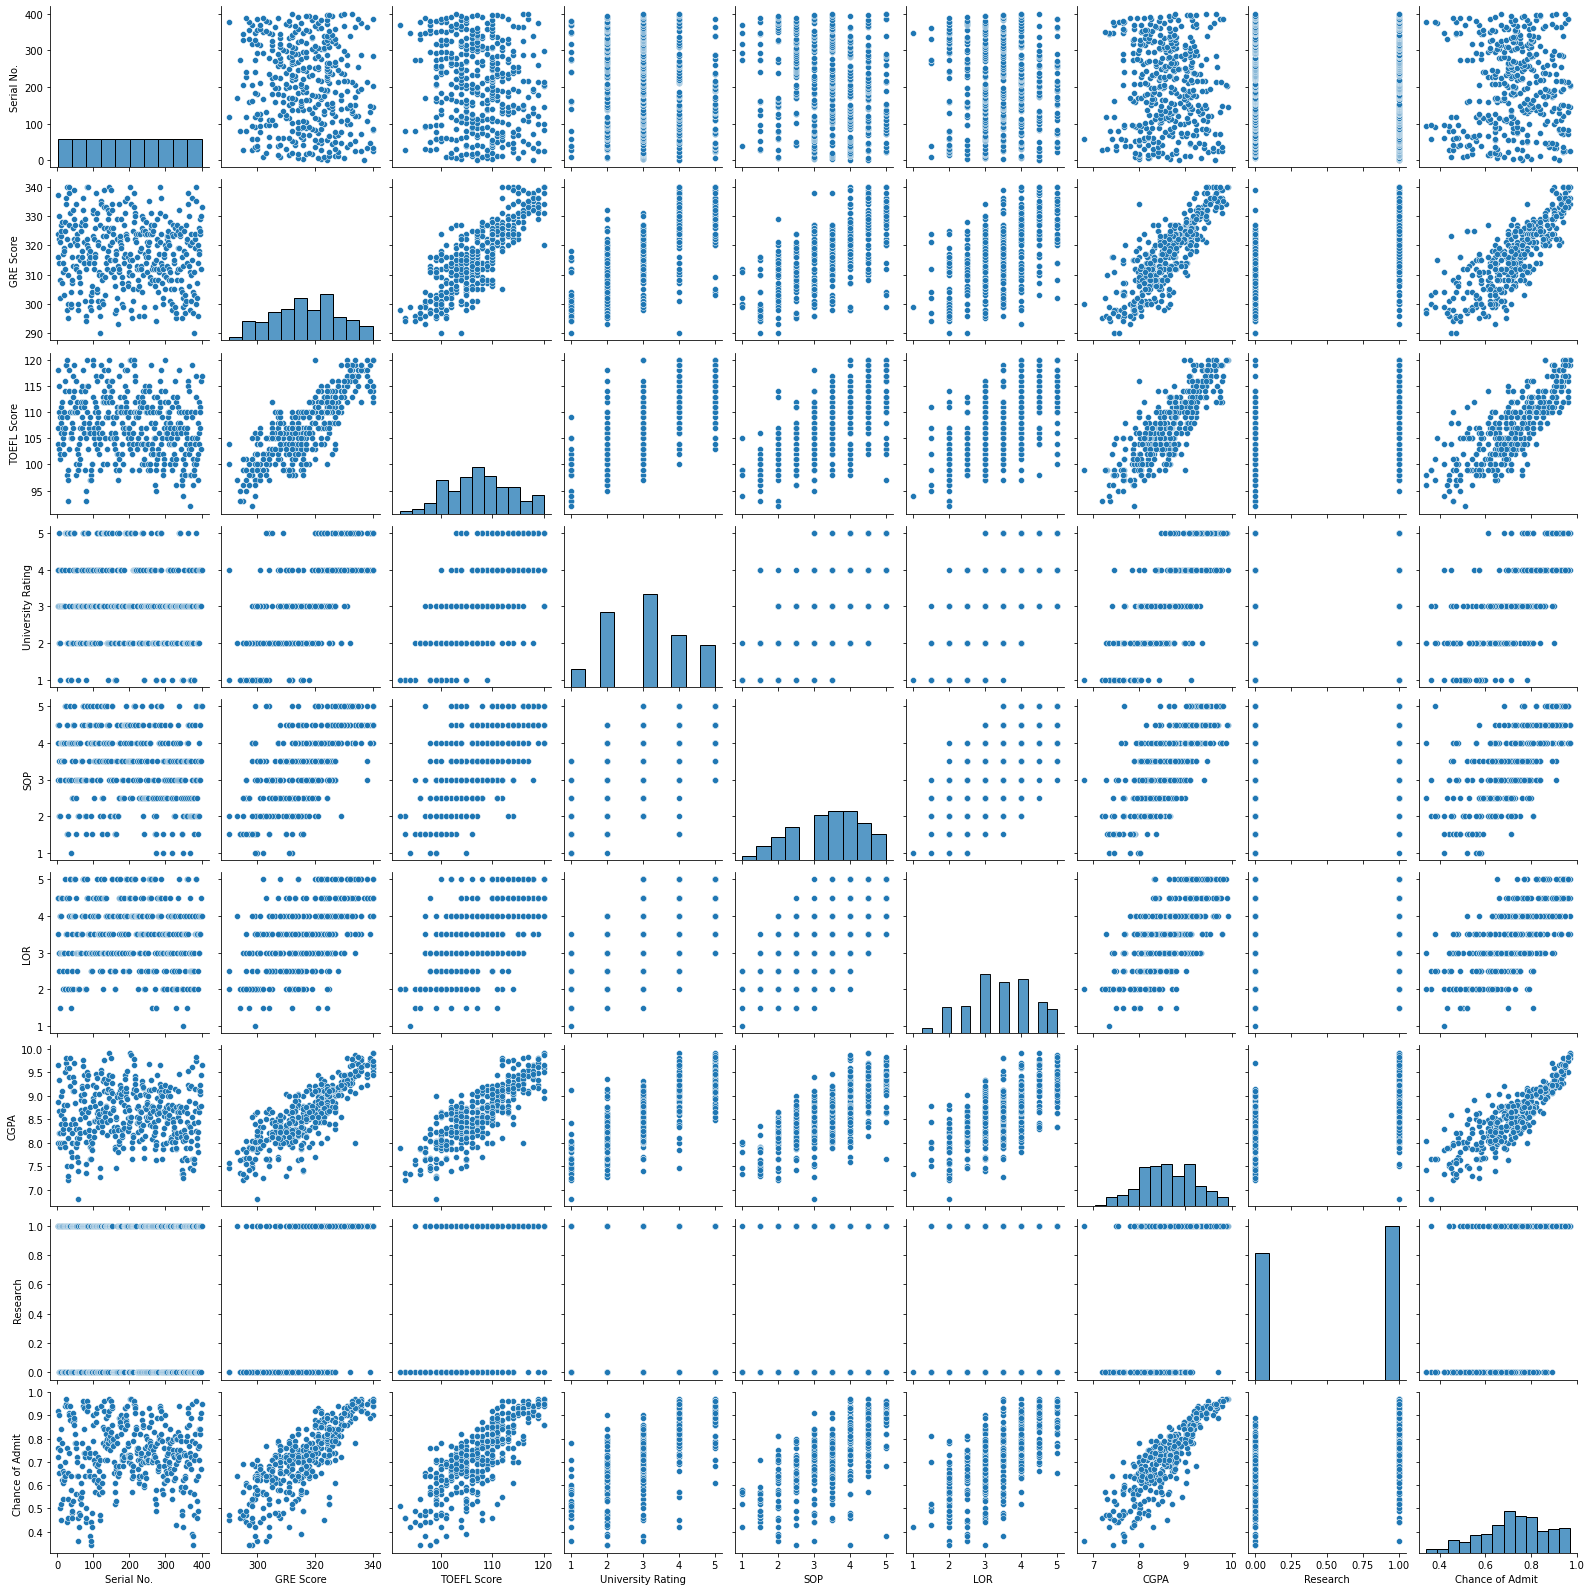

In [16]:
sns.pairplot(data = data)
plt.show()

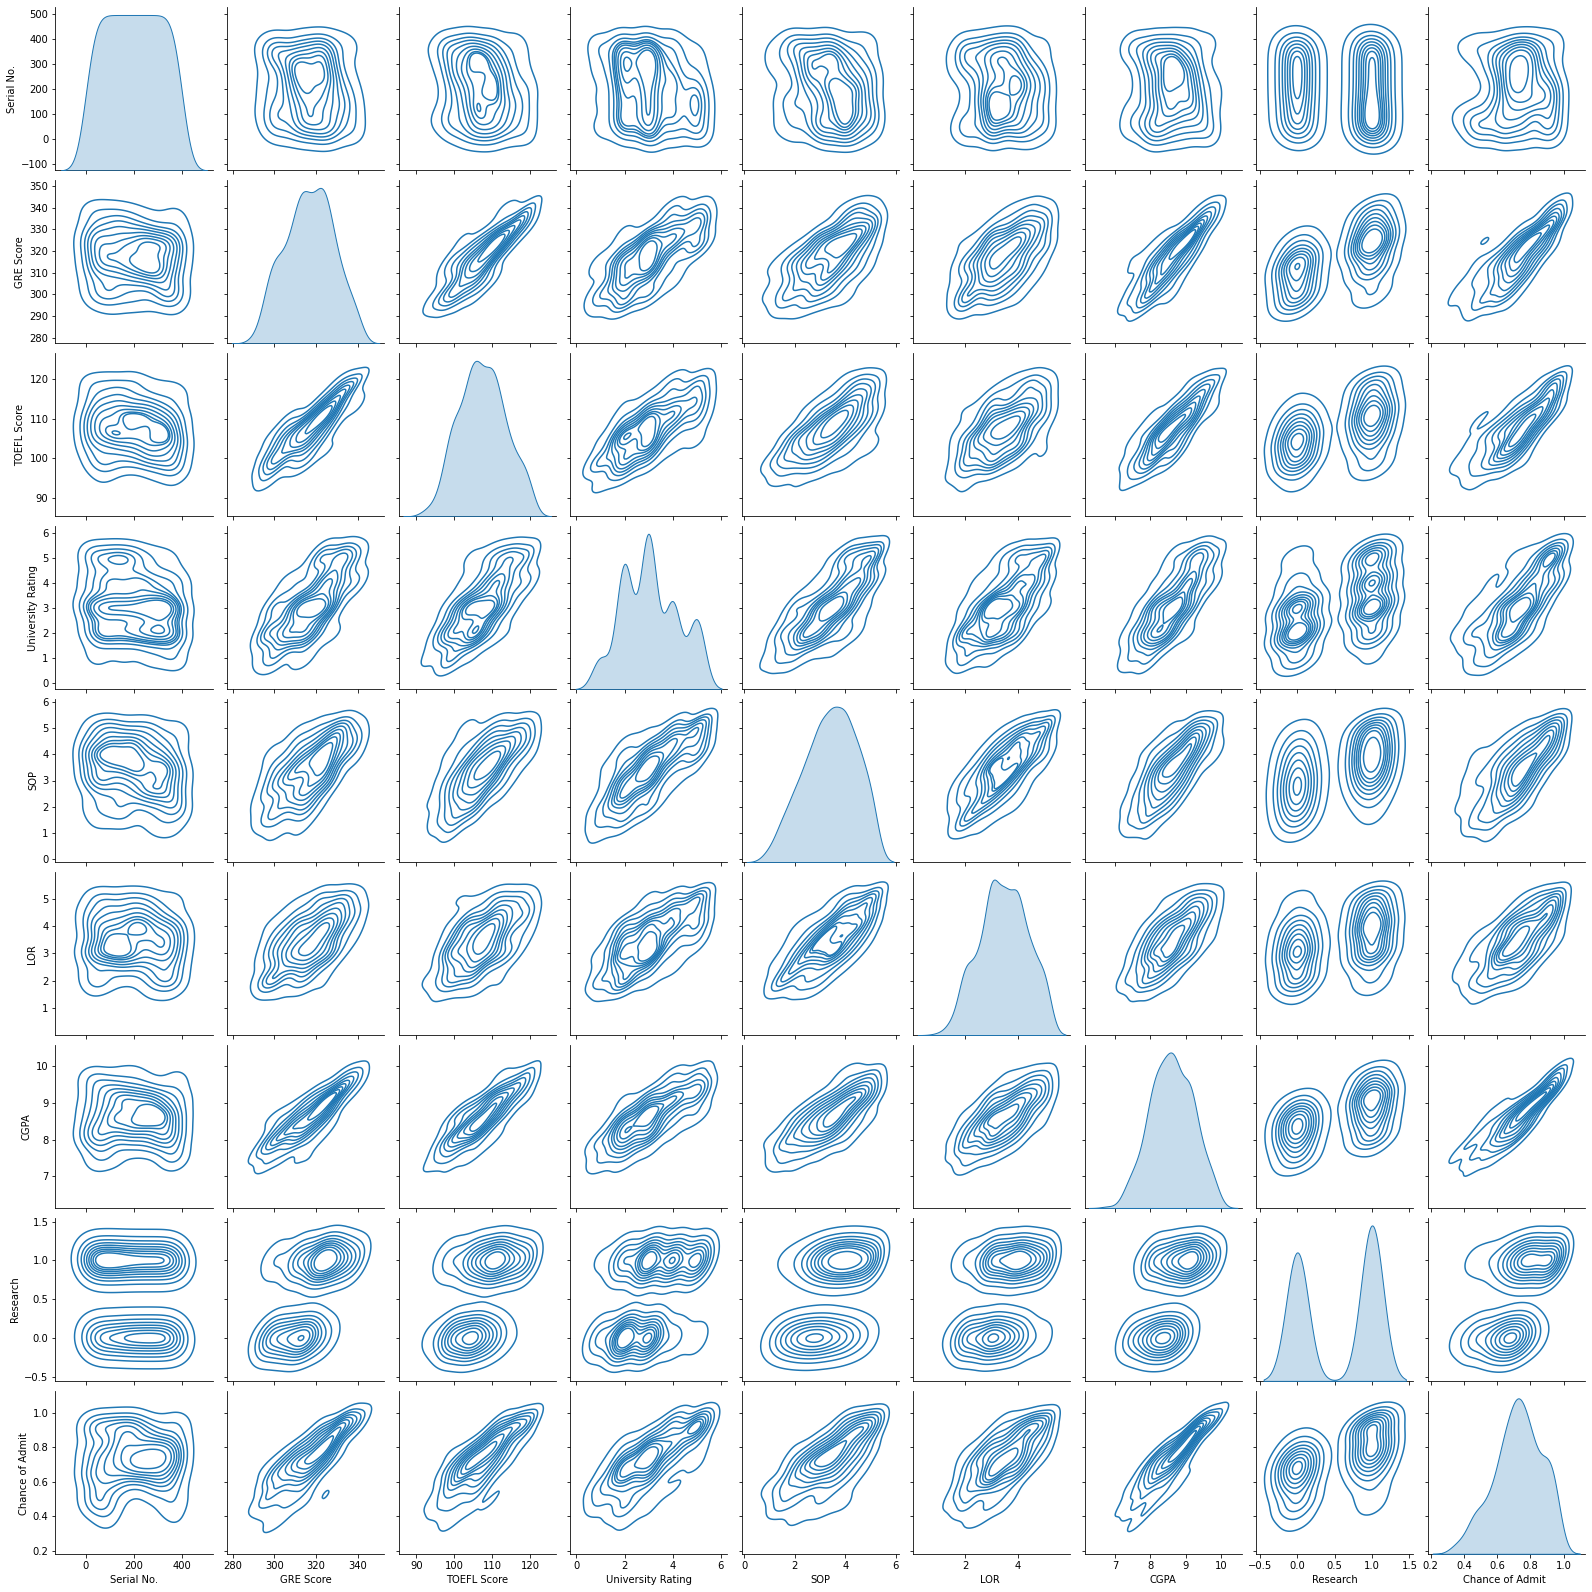

In [17]:
sns.pairplot(data=data,kind="kde")

**GENERATING HEAT MAP**

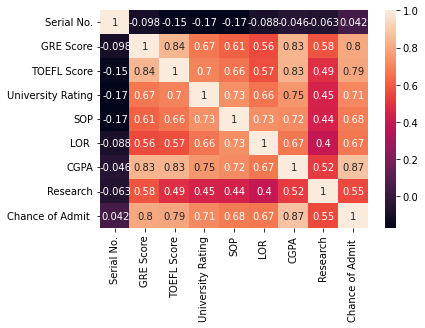

In [18]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix,annot = True)
plt.show()

**CHECK FOR MISSING VALUES**

In [19]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**PERFORMING DESCRIPTIVE ANALYSIS**

In [20]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [21]:
data.shape

(400, 9)

In [22]:
data['Chance of Admit '].mean()

0.72435

In [23]:
data['SOP'].median()

3.5

**DATA TRANSFORMATION**

In [24]:
x=data.drop(['Serial No.','Chance of Admit '],axis=1) 
y=data['Chance of Admit ']
print(x.shape,y.shape)



(400, 7) (400,)


**SPLITTING THE DATASET INTO TRAINING AND TESTING SETS**

In [25]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) 
print(x_train.shape)
print(x_test.shape) 
print(y_train.shape)
print(y_test.shape)


(320, 7)
(80, 7)
(320,)
(80,)


In [26]:
from sklearn.preprocessing import MinMaxScaler 
mms=MinMaxScaler()
x_train[x_train.columns]=mms.fit_transform(x_train[x_train.columns].values) 
x_test[x_test.columns]=mms.transform(x_test[x_test.columns].values)


**CHOOSING AND TRAINING OF THE MODEL**

In [27]:
from sklearn.ensemble import RandomForestRegressor 
model=RandomForestRegressor() 
model.fit(x_train,y_train) 


RandomForestRegressor()

**PREDICTING THE MODEL**

In [28]:
y_pred=model.predict(x_test)
print(y_pred) 
print(y_test)

[0.632  0.9235 0.9339 0.8597 0.6728 0.688  0.8801 0.6989 0.7534 0.6366
 0.7313 0.6723 0.6799 0.9056 0.6854 0.7087 0.9664 0.7915 0.6898 0.7317
 0.8725 0.7768 0.8433 0.6178 0.8002 0.7228 0.9292 0.7497 0.9565 0.8191
 0.6847 0.7163 0.7293 0.7223 0.7267 0.6349 0.8536 0.7923 0.7378 0.8344
 0.6821 0.7312 0.7065 0.8132 0.6692 0.7297 0.5655 0.9092 0.7166 0.6333
 0.9001 0.6912 0.5427 0.7671 0.7272 0.6539 0.6649 0.5444 0.8266 0.5659
 0.6619 0.7072 0.6542 0.9467 0.9674 0.7003 0.9274 0.5792 0.5565 0.4489
 0.6804 0.7578 0.6379 0.9393 0.7065 0.4545 0.8376 0.6271 0.6659 0.7783]
92     0.34
284    0.94
108    0.93
190    0.90
61     0.47
       ... 
348    0.57
335    0.83
314    0.66
146    0.75
242    0.70
Name: Chance of Admit , Length: 80, dtype: float64


**MODEL PREDICTION**

In [29]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,recall_score,roc_auc_score,confusion_matrix
print('model score:',model.score(x_test,y_test))


model score: 0.6978303493398801


**CALCULATING EVALUATION METRICS**

In [30]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred))) 
print('roc score:',roc_auc_score(y_test>0.5, y_pred>0.5))
print('recall score:',recall_score(y_test>0.5, y_pred>0.5))

Mean Absolute Error: 0.0557974999999999
Mean Squared Error: 0.006672052249999986
Root Mean Squared Error: 0.08168263126271084
roc score: 0.5555555555555556
recall score: 0.9861111111111112


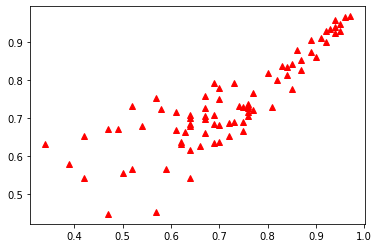

In [31]:
y_predict = model.predict(x_test)
plt.plot(y_test,y_predict,'^',color = 'r')

**DOWNLOADING THE MODEL**

In [32]:
import pickle

In [33]:
pickle.dump(model,open('model.pkl','wb'))